# Weekly Tracking of COVID-19 Reproduction Number in Taiwan

### Method

Reproduction number, or $R$ value, is an numerical estimation of the speed in disease propagation. Different to the confirmed case number which reports severity of pandemic, $R$ reflects the future developing cases. $R$ can also be interpreted as the number of person that being infected by an existing patient. Therefore, the estimation of $R$ is crucial in containing the pandemic. By the definition of $R$,
<br><br>
<center>$\normalsize{R = e^{K\tau}}$</center>

where $K$ is logarithmic growth rate
<center>$\normalsize{{K = \dfrac{ln(2)}{T_d}}}$</center>
    
and $T_d$ is the doubling time
<center>$\normalsize{T_d = (t_2 - t_1) \dfrac{ln(2)}{ln(\frac{q_2}{q_1})}}$</center>

we can roughly estimate the $R$ and its trend without considering any complicated mathematical model. <br>
In the calculation of $R$, we substitude $T_d$ into the third equation and $K$ can be expressed as
<br><br>
<center>$\normalsize{K = \dfrac{ln(\frac{q_2}{q_1})}{(t_2 - t_1)}}$</center>

and the $\tau$ and $T_d$ are 7 days since we would like to observe the weekly trend.

In [ ]:
import requests
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime, date
from matplotlib import dates
pd.options.mode.chained_assignment = None

In [44]:
r = requests.post(
    'https://od.cdc.gov.tw/eic/Weekly_Confirmation_Age_County_Gender_19CoV.json')
r.encoding = 'uft-8'

df = pd.read_json(StringIO(r.text.replace("/", "-")))

In [92]:
tpdf = pd.DataFrame(columns=['Week', 'Case', 'T1/2', 'Rt'])
tpdf['Week'] = [*range(int(date(2021, 4, 15).strftime("%V")), int(datetime.today().strftime("%V"))+1)]
tpdf = tpdf.replace(np.nan, 0)

In [93]:
for i in range(len(tpdf)):
    for j in range(len(df)):
        if ((df['研判年份'][j] == 2021) and (df['是否為境外移入'][j] == '否') and (int(df['研判週別'][j]) == tpdf['Week'][i])):
            tpdf['Case'][i] = df['確定病例數'][j] + tpdf['Case'][i]

   Week  Case  T1/2  Rt
0    15     0     0   0
1    16     1     0   0
2    17    10     0   0
3    18     8     0   0
4    19   247     0   0
5    20  2355     0   0
6    21  3916     0   0
7    22  3143     0   0


In [1]:
for i in range(1, len(tpdf)-1):
    tpdf['T1/2'][i+1] = 7 * np.log(2) / (np.log(sum(tpdf['Case'][1:i+2])) - np.log(sum(tpdf['Case'][1:i+1])))
    tpdf['Rt'][i+1] = np.exp(7* np.log(2) / tpdf['T1/2'][i+1])
    
print(tpdf)

NameError: name 'tpdf' is not defined

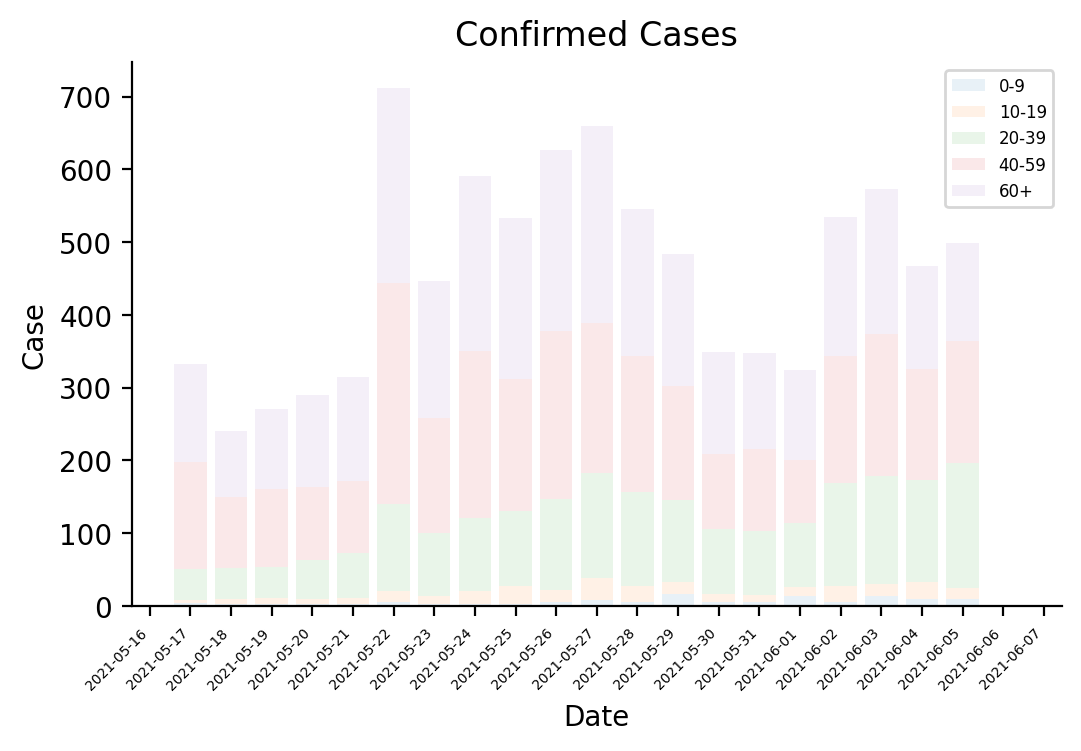

In [14]:
fig, ax = plt.subplots(dpi=200)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.bar(tpdf["Week"], tpdf["Case"], alpha=0.1, label="Case")
plt.plot(mdf["Week"], mdf["Rt"], alpha=0.1, label="Rt")
plt.legend(prop={'size': 6})
plt.xlabel("Date")
ax.xaxis.set_major_locator(dates.DayLocator(interval=1))
fig.autofmt_xdate(rotation=45)
plt.xticks(fontsize=5)
plt.ylabel("Case")
plt.title('Confirmed Cases')
plt.show()